In [3]:
import torch
import torch.nn as nn # Base model for all neural nets
import torchvision.datasets as dsets # Contains MNIST dataset
import torchvision.transforms as transforms # Common image transforms
from torch.autograd import Variable # Used for auto differential on vectors

In [41]:
import matplotlib.pyplot as plt

In [44]:
input_size = 784 # Images are 28x28=784 pixels
hidden_size = 500
num_classes = 10
num_epochs = 15
batch_size = 100
learning_rate = 0.0001

In [45]:
# MNIST Dataset
train_dataset = dsets.MNIST(root='./data', # Location to download
                           train=True, # Get Train data vs Test data
                           transform=transforms.ToTensor(), # Transforms PIL image to single tensor
                           download=True) # Download dataset

Processing...
Done!


In [46]:
test_dataset = dsets.MNIST(root='./data',
                          train=False,
                          transform=transforms.ToTensor())

In [47]:
# Data Loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                       batch_size=batch_size,
                                       shuffle=False)

In [48]:
# Since we're doing a single layer NN, Tanh is better than ReLU. Results from doing ReLU = 94%, Tanh = 96%

In [49]:
# Neural Network w/ 1 hidden layer
# TODO Describe each part later
class Net(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(Net,self).__init__()
        self.fc1 = nn.Linear(input_size,hidden_size)
        #self.relu=nn.ReLU()
        self.tanh=nn.Tanh()
        self.fc2 = nn.Linear(hidden_size,num_classes)
        
    def forward(self, x):
        out = self.fc1(x)
        #out = self.relu(out)
        out = self.tanh(out)
        out = self.fc2(out)
        return out

In [50]:
net = Net(input_size, hidden_size, num_classes)

In [51]:
# Loss and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)

In [52]:
loss_time = []

In [53]:
# Training the Model
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Convert tensors to variables
        images = Variable(images.view(-1,28*28)) # Converts image Differentialable column vector of size 784
        labels = Variable(labels)
        
        # Forward + Backward + Optimize
        optimizer.zero_grad() # Zero the gradient buffer
        outputs = net(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        # Print every 100 steps
        if(i+1)%100 == 0:
            print ('Epoch [%d/%d], Step [%d/%d], Loss: %.4f' 
                   %(epoch+1, num_epochs, i+1, len(train_dataset)//batch_size, loss.data[0]))
    loss_time.append(loss.data[0])

Epoch [1/15], Step [100/600], Loss: 1.1008
Epoch [1/15], Step [200/600], Loss: 0.8003
Epoch [1/15], Step [300/600], Loss: 0.4190
Epoch [1/15], Step [400/600], Loss: 0.4501
Epoch [1/15], Step [500/600], Loss: 0.4922
Epoch [1/15], Step [600/600], Loss: 0.4157
Epoch [2/15], Step [100/600], Loss: 0.3454
Epoch [2/15], Step [200/600], Loss: 0.4242
Epoch [2/15], Step [300/600], Loss: 0.2189
Epoch [2/15], Step [400/600], Loss: 0.4990
Epoch [2/15], Step [500/600], Loss: 0.1895
Epoch [2/15], Step [600/600], Loss: 0.2630
Epoch [3/15], Step [100/600], Loss: 0.3036
Epoch [3/15], Step [200/600], Loss: 0.3545
Epoch [3/15], Step [300/600], Loss: 0.3021
Epoch [3/15], Step [400/600], Loss: 0.3923
Epoch [3/15], Step [500/600], Loss: 0.2924
Epoch [3/15], Step [600/600], Loss: 0.1867
Epoch [4/15], Step [100/600], Loss: 0.1288
Epoch [4/15], Step [200/600], Loss: 0.2459
Epoch [4/15], Step [300/600], Loss: 0.1579
Epoch [4/15], Step [400/600], Loss: 0.2530
Epoch [4/15], Step [500/600], Loss: 0.2022
Epoch [4/15

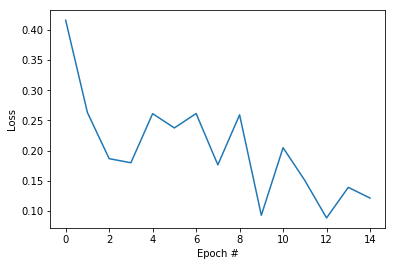

In [54]:
plt.plot(loss_time)
plt.ylabel('Loss')
plt.xlabel('Epoch #')
plt.show()

In [56]:
# Test Model
correct = 0
total = 0
for images, labels in test_loader:
    images = Variable(images.view(-1, 28*28))
    outputs = net(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()

In [57]:
print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))

Accuracy of the network on the 10000 test images: 96 %


In [30]:
# Save the model to disk
torch.save(net.state_dict(), 'model.pkl')